# Project Pattern Mining

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fim import apriori

In [26]:
df = pd.read_csv("train_cleaned.csv")

In [27]:
column2drop = ["name", "artists", "album_name"]
df.drop(column2drop, axis=1, inplace=True)

In [28]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,241760,False,46,0.690,0.513,5,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance
1,444000,False,0,0.069,0.196,1,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian
2,333506,False,3,0.363,0.854,2,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal
3,269800,False,23,0.523,0.585,5,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass
4,307651,False,25,0.643,0.687,7,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy


In [29]:
labels = ["LOW", "MID", "HIGH"]
colonne = ["duration_ms", "popularity","danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
for colonna in colonne:
    df[(f"{colonna}_bin")] = pd.qcut(df[str(colonna)], 3, labels= labels)
    df[f"{colonna}_bin"] = df[f"{colonna}_bin"].astype(str) + f"_{colonna[: 4].upper()}"
    df[(colonna)] = pd.qcut(df[str(colonna)], 3,)
    df[(f"{colonna}_bin")] = df[f"{colonna}_bin"].astype(str) + " " + df[(colonna)].astype(str)
    df.drop([colonna], axis=1, inplace=True)

df.drop(["time_signature", "explicit"], axis=1, inplace=True)


df.head()

,genre,duration_ms_bin,popularity_bin,danceability_bin,energy_bin,key_bin,loudness_bin,speechiness_bin,acousticness_bin,instrumentalness_bin,liveness_bin,valence_bin,tempo_bin
0,j-dance,"MID_DURA (196231.667, 265257.667]","HIGH_POPU (35.0, 94.0]","HIGH_DANC (0.657, 0.98]","LOW_ENER (-0.001, 0.562]","MID_KEY (3.0, 7.0]","LOW_LOUD (-49.532, -9.214]","HIGH_SPEE (0.0698, 0.939]","MID_ACOU (0.0316, 0.415]","HIGH_INST (0.377, 1.0]","HIGH_LIVE (0.209, 0.994]","HIGH_VALE (0.578, 0.995]","HIGH_TEMP (134.984, 220.525]"
1,iranian,"HIGH_DURA (265257.667, 4120258.0]","LOW_POPU (-0.001, 18.0]","LOW_DANC (-0.001, 0.496]","LOW_ENER (-0.001, 0.562]","LOW_KEY (-0.001, 3.0]","LOW_LOUD (-49.532, -9.214]","HIGH_SPEE (0.0698, 0.939]","MID_ACOU (0.0316, 0.415]","HIGH_INST (0.377, 1.0]","HIGH_LIVE (0.209, 0.994]","LOW_VALE (-0.001, 0.269]","LOW_TEMP (-0.001, 109.646]"
2,black-metal,"HIGH_DURA (265257.667, 4120258.0]","LOW_POPU (-0.001, 18.0]","LOW_DANC (-0.001, 0.496]","HIGH_ENER (0.834, 1.0]","LOW_KEY (-0.001, 3.0]","MID_LOUD (-9.214, -5.791]","LOW_SPEE (-0.001, 0.0412]","LOW_ACOU (-0.001, 0.0316]","HIGH_INST (0.377, 1.0]","HIGH_LIVE (0.209, 0.994]","MID_VALE (0.269, 0.578]","MID_TEMP (109.646, 134.984]"
3,bluegrass,"HIGH_DURA (265257.667, 4120258.0]","MID_POPU (18.0, 35.0]","MID_DANC (0.496, 0.657]","MID_ENER (0.562, 0.834]","MID_KEY (3.0, 7.0]","HIGH_LOUD (-5.791, 3.156]","HIGH_SPEE (0.0698, 0.939]","MID_ACOU (0.0316, 0.415]","MID_INST (1.27e-05, 0.377]","MID_LIVE (0.107, 0.209]","MID_VALE (0.269, 0.578]","HIGH_TEMP (134.984, 220.525]"
4,happy,"HIGH_DURA (265257.667, 4120258.0]","MID_POPU (18.0, 35.0]","MID_DANC (0.496, 0.657]","MID_ENER (0.562, 0.834]","MID_KEY (3.0, 7.0]","LOW_LOUD (-49.532, -9.214]","MID_SPEE (0.0412, 0.0698]","LOW_ACOU (-0.001, 0.0316]","MID_INST (1.27e-05, 0.377]","HIGH_LIVE (0.209, 0.994]","HIGH_VALE (0.578, 0.995]","HIGH_TEMP (134.984, 220.525]"


In [30]:
X = df.values.tolist()


# APRIORI

In [31]:
help(apriori)

# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

### Frequent Itemset

In [32]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(HIGH_ENER (0.834, 1.0], LOW_ACOU (-0.001, 0.0...",20.240000
1,"(HIGH_ENER (0.834, 1.0], HIGH_LOUD (-5.791, 3....",21.993333
2,"(HIGH_ACOU (0.415, 0.996], LOW_ENER (-0.001, 0...",23.193333
3,"(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",24.160000
4,"(LOW_DANC (-0.001, 0.496], LOW_VALE (-0.001, 0...",20.800000


### Closed Itemsets

In [33]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(HIGH_ENER (0.834, 1.0], LOW_ACOU (-0.001, 0.0...",20.240000
1,"(HIGH_ENER (0.834, 1.0], HIGH_LOUD (-5.791, 3....",21.993333
2,"(HIGH_ACOU (0.415, 0.996], LOW_ENER (-0.001, 0...",23.193333
3,"(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",24.160000
4,"(LOW_DANC (-0.001, 0.496], LOW_VALE (-0.001, 0...",20.800000


### Maximal Itemsets

In [34]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(HIGH_ENER (0.834, 1.0], LOW_ACOU (-0.001, 0.0...",20.240000
1,"(HIGH_ENER (0.834, 1.0], HIGH_LOUD (-5.791, 3....",21.993333
2,"(HIGH_ACOU (0.415, 0.996], LOW_ENER (-0.001, 0...",23.193333
3,"(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",24.160000
4,"(LOW_DANC (-0.001, 0.496], LOW_VALE (-0.001, 0...",20.800000


### Support plots

#### Support vs number of itemsets

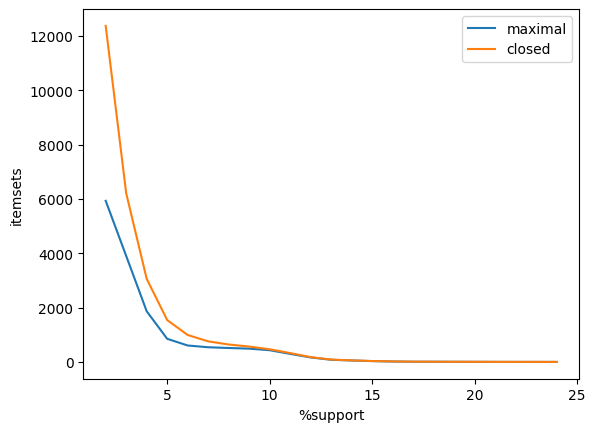

In [35]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

## Rules

In [36]:
conf = 60
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
6,"LOW_LOUD (-49.532, -9.214]","(HIGH_ACOU (0.415, 0.996], LOW_ENER (-0.001, 0...",2676,17.840000,0.769187,2.307560
7,"HIGH_ACOU (0.415, 0.996]","(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",2676,17.840000,0.738411,2.217893
10,"LOW_ENER (-0.001, 0.562]","(LOW_LOUD (-49.532, -9.214],)",3624,24.160000,0.724800,2.170493
11,"LOW_LOUD (-49.532, -9.214]","(LOW_ENER (-0.001, 0.562],)",3624,24.160000,0.723498,2.170493
8,"LOW_ENER (-0.001, 0.562]","(HIGH_ACOU (0.415, 0.996],)",3479,23.193333,0.696636,2.086153
9,"HIGH_ACOU (0.415, 0.996]","(LOW_ENER (-0.001, 0.562],)",3479,23.193333,0.694550,2.086153
4,"HIGH_LOUD (-5.791, 3.156]","(HIGH_ENER (0.834, 1.0],)",3299,21.993333,0.662849,1.988547
5,"HIGH_ENER (0.834, 1.0]","(HIGH_LOUD (-5.791, 3.156],)",3299,21.993333,0.659800,1.988547
0,"HIGH_LOUD (-5.791, 3.156]","(HIGH_ENER (0.834, 1.0], LOW_ACOU (-0.001, 0.0...",1985,13.233333,0.653821,1.961462
12,"LOW_VALE (-0.001, 0.269]","(LOW_DANC (-0.001, 0.496],)",3120,20.800000,0.623501,1.867143


from matplotlib import pyplot as plt
_df_23['abs_support'].plot(kind='hist', bins=20, title='abs_support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['%_support'].plot(kind='hist', bins=20, title='%_support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['lift'].plot(kind='hist', bins=20, title='lift')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('consequent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='abs_support', y='%_support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='%_support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['abs_support'].plot(kind='line', figsize=(8, 4), title='abs_support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['%_support'].plot(kind='line', figsize=(8, 4), title='%_support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['lift'].plot(kind='line', figsize=(8, 4), title='lift')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['consequent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='abs_support', y='consequent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['consequent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='%_support', y='consequent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['consequent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='confidence', y='consequent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['consequent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='lift', y='consequent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Classification

In [37]:
rules_df[rules_df["consequent"] == "genre"]

,consequent,antecedent,abs_support,%_support,confidence,lift


In [38]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

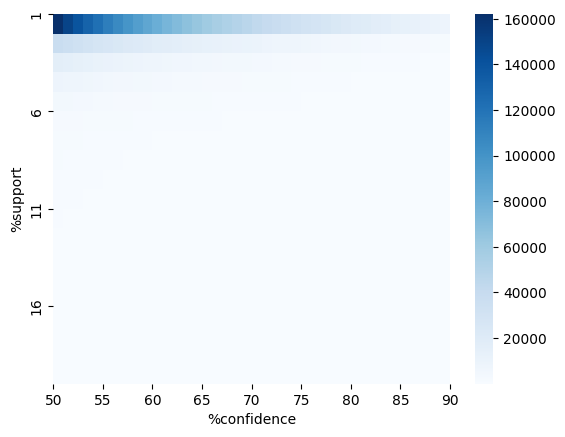

In [39]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

## FP-Growth

In [40]:
from fim import fpgrowth

In [41]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(LOW_DANC (-0.001, 0.496], LOW_VALE (-0.001, 0...",20.800000
1,"(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",24.160000
2,"(HIGH_ACOU (0.415, 0.996], LOW_ENER (-0.001, 0...",23.193333
3,"(HIGH_ENER (0.834, 1.0], HIGH_LOUD (-5.791, 3....",21.993333
4,"(HIGH_ENER (0.834, 1.0], LOW_ACOU (-0.001, 0.0...",20.240000


In [42]:
conf = 70
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,"LOW_ENER (-0.001, 0.562]","(LOW_LOUD (-49.532, -9.214],)",3624,24.16,0.724800,2.170493
1,"LOW_LOUD (-49.532, -9.214]","(LOW_ENER (-0.001, 0.562],)",3624,24.16,0.723498,2.170493
2,"LOW_LOUD (-49.532, -9.214]","(HIGH_ACOU (0.415, 0.996], LOW_ENER (-0.001, 0...",2676,17.84,0.769187,2.307560
3,"HIGH_ACOU (0.415, 0.996]","(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",2676,17.84,0.738411,2.217893


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['abs_support'].plot(kind='hist', bins=20, title='abs_support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['%_support'].plot(kind='hist', bins=20, title='%_support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('consequent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('antecedent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='abs_support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='abs_support', y='%_support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='%_support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['abs_support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequent')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequent', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('abs_support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['abs_support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('antecedent')):
  _plot_series(series, series_name, i)
  fig.legend(title='antecedent', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('abs_support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['%_support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequent')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequent', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('%_support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['%_support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('antecedent')):
  _plot_series(series, series_name, i)
  fig.legend(title='antecedent', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('%_support')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['abs_support'].plot(kind='line', figsize=(8, 4), title='abs_support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['%_support'].plot(kind='line', figsize=(8, 4), title='%_support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['antecedent'].value_counts()
    for x_label, grp in _df_18.groupby('consequent')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('consequent')
_ = plt.ylabel('antecedent')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['consequent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='consequent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['antecedent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='antecedent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['consequent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='abs_support', y='consequent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['antecedent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='abs_support', y='antecedent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)